## Mandelbrot set using numpy vectorization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

Ignore overflow warnings, they're expected.

In [78]:
warnings.simplefilter('ignore')


> The Mandelbrot set is the set of values of c in the complex plane for which the orbit of the critical point z = 0 under iteration of the quadratic map
> 
> $ Z_{n+1} = Z_n^2 + C$
> 
> Thus, a complex number c is a member of the Mandelbrot set if, when starting with z0 = 0 and applying the iteration repeatedly, the absolute value of zn remains bounded for all n > 0.

https://en.wikipedia.org/wiki/Mandelbrot_set

In [6]:
def c(x, y, size, pixels=800):
    'The area of the complex plane we want to plot the set for'
    left,right,top,bottom=x-size/2,x+size/2,y-size/2,y+size/2

    return np.array([
        [
            complex(i,j)
            for i in np.linspace(left,right,pixels)
        ]
        for j in np.linspace(bottom,top,pixels)
    ])


In [100]:
def mandelbrot(x,y,size,pixels=400): 
    C=c(x,y,size,pixels)
    Z=np.zeros(C.shape,dtype=np.complex)
    m=np.zeros(C.shape,dtype=np.int)
    for divergence in range(255,-1,-1):
        Z=Z*Z+C
        m=np.where(abs(Z)>2, np.maximum(m, divergence), m)
    return m

In [158]:
def plot(x,y,size,cmap='bone'):
    plt.figure(figsize = (8,8))
    plt.axis('off')
    plt.imshow(mandelbrot(x,y,size), cmap=cmap)


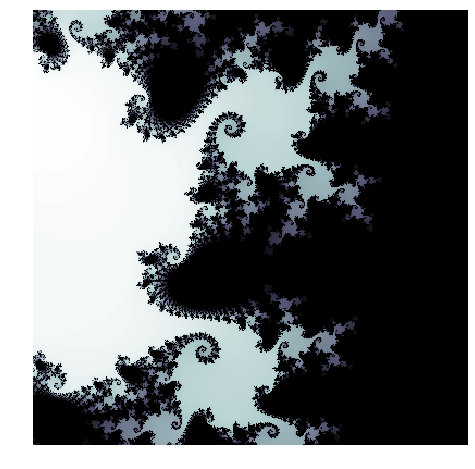

In [159]:
plot(-.7430, 0.1047,.0040)   